## Random Forest Regression


In [3]:
import pandas as pd 
df = pd.read_csv('../raw_data/df_grouped_rate.csv') #폴더 위치는 상이할 수 있음


In [4]:
y=df.iloc[:,3:4]
# y

In [5]:
X= df.iloc[:,1:].drop(['sales_total'],axis=1)
# X

In [6]:
# 더미변수화
X_dum1 = pd.get_dummies(X.iloc[:,0])  #district는 범주형으로 인식 안해서 따로 실시
X_dum2 = pd.get_dummies(X.iloc[:,1:])
X = pd.concat([X_dum1, X_dum2],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.
# 로버스트 스케일링
rb = RobustScaler()
Xs_train = rb.fit_transform(X_train)
Xs_test = rb.transform(X_test)

In [10]:

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=30,max_depth=20, random_state=0)
model=regr.fit(Xs_train, y_train)
y_pred=regr.predict(Xs_test)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [11]:
import numpy as np
# 정확도 결과값
print(model.score(Xs_train, y_train))
print(model.score(Xs_test, y_test))
# 오차 결과값

from sklearn import metrics
y_pred = model.predict(Xs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8839901648173566
0.7070926934422379
Mean Absolute Error: 440726135.2669546
Mean Squared Error: 7.904894764852026e+17
Root Mean Squared Error: 889094751.1290361


In [12]:
from sklearn.metrics import r2_score
print("R-Squared score:", r2_score(y_test , y_pred))

R-Squared score: 0.7070926934422379


In [14]:
yy_test=np.array(y_test).reshape(-1,)

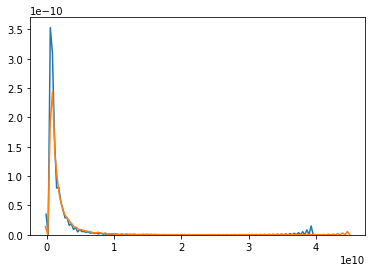

In [16]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(y_pred)
sns.kdeplot(yy_test)
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())
scores
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

0.6418387729283273


array([0.71865104, 0.77897799, 0.80029027, 0.71467097, 0.1966036 ])